### Optimizacion Programacion Lineal en Python: Decidir a donde ir para Vacaciones

Se utilizara la libreria de Pulp

Formulacion del Problema: Tu quieres ir de vacaciones, pero tienes solamente un numero limitado de dias.
Ademas que se quiere minimizar el costo. Y en internet se ofrecen multiples opciones, y se debera elegir la 
opcion mas optima.

* Funcion de Objetivo: Minimizar Costo de Vacaciones mientras seleccionas el paquete optimo de viaje
* Problema: Problema de Minimizacion
* Variables de decision: Variables binarias sobre si comprar el paquete o no.
* Constraints: Numero limitado de Vacaciones

### 1. Entendiendo la Base de datos
* Destino final
* Duracion del viaje
* Total del Costo del Viaje
* Descripcion pequeña de la aventura


![Texto alternativo](solvers.png)

In [1]:
from pulp import *
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
data = pd.read_csv("clymb_adventures.csv", encoding="ISO-8859-1")
data.head(7)

,destination,duration,cost,description
0,Baja,7,899,Hike Bike and Sea Kayak and more on a Remote P...
1,Nepal,11,899,Explore the land and culture of the Himalayas....
2,Spain,8,568,Sport climb & deep water solo in Mallorca. Dis...
3,Yosemite,5,750,Guided hiking through stunning high country. E...
4,Utah,6,1356,Hike. Canyoneer. Rock Climb. and more!. Experi...
5,Utah,4,680,Ride mountain bike through Canyonlands. Follow...
6,San Juan Islands,4,559,Kayak in search of orca whales. Kayak amongst ...


In [3]:
data.describe()

,duration,cost
count,42.000000,42.000000
mean,6.166667,1128.261905
std,3.275308,774.499777
min,2.000000,198.000000
25%,4.000000,462.250000
50%,6.000000,899.000000
75%,8.000000,1593.500000
max,14.000000,3175.000000


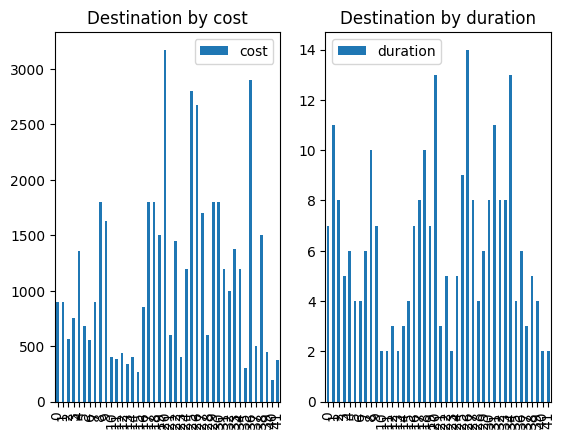

In [4]:
fig, axs = plt.subplots(1, 2)
my_plot = data[['destination', 'cost']].plot(kind='bar', title='Destination by cost', ax = axs[0])
my_plot = data[['destination', 'duration']].plot(kind='bar', title='Destination by duration', ax = axs[1])

Setting Lp Problem
* Define the LP Object 
* The prob variable is created to contain the formulation, and the usual parameters are passed into LpProblem

### 2. Problema de Optimizacion

Creando la instancia del problema de optimizacion

In [5]:
#create INSTANCIA the LP object, set up as a minimization problem ---> since we to minimize the cost
prob = pulp.LpProblem('ObtenerVacacion', LpMinimize)

Creando las Variables de Decision

#### x0: Vacaciones Baja
#### x1: Vacaciones Nepal
#### x2: Vacaciones Spain
#### ........

In [6]:
variables_decision = []
# En cada iteración, se crea una variable de decisión con un nombre único que comienza con 'x' seguido 
#del número de fila (por ejemplo, 'x0', 'x1', 'x2', etc.). Estas variables de decisión se crean utilizando 
#la función LpVariable de PuLP y se configuran con un límite inferior de 0 y un límite superior de 1, lo
#que indica que son variables binarias (0 o 1).
for rownum, row in data.iterrows():
    variable = str('x' + str(rownum))
    #Se establece en 'Integer', lo que significa que estas variables son números enteros
    variable = LpVariable(str(variable), lowBound=0, upBound=1, cat='Integer') #
    variables_decision.append(variable)
    
    print("Numero total de Variables de decision : " + str(len(variables_decision)))
    print("Array con las Variables de decision : " + str(variables_decision))

Numero total de Variables de decision : 1
Array con las Variables de decision : [x0]
Numero total de Variables de decision : 2
Array con las Variables de decision : [x0, x1]
Numero total de Variables de decision : 3
Array con las Variables de decision : [x0, x1, x2]
Numero total de Variables de decision : 4
Array con las Variables de decision : [x0, x1, x2, x3]
Numero total de Variables de decision : 5
Array con las Variables de decision : [x0, x1, x2, x3, x4]
Numero total de Variables de decision : 6
Array con las Variables de decision : [x0, x1, x2, x3, x4, x5]
Numero total de Variables de decision : 7
Array con las Variables de decision : [x0, x1, x2, x3, x4, x5, x6]
Numero total de Variables de decision : 8
Array con las Variables de decision : [x0, x1, x2, x3, x4, x5, x6, x7]
Numero total de Variables de decision : 9
Array con las Variables de decision : [x0, x1, x2, x3, x4, x5, x6, x7, x8]
Numero total de Variables de decision : 10
Array con las Variables de decision : [x0, x1, x

Define la Funcion Objetivo: (Minimizacion de los Costos Viaje)

La variable "prob" ahora comienza a recopilar datos del problema con el operador +=. Lógicamente, 
la función objetivo se ingresa primero, al final esta la función objetivo:


In [7]:
total_costo = ""
#El bucle exterior está diseñado para recorrer las filas de data, y el bucle 
#interior está diseñado para coincidir con cada variable de decisión con su fila correspondiente en data
for rownum, row in data.iterrows():
    for i, schedule in enumerate(variables_decision):
        #Cada iteración de ambos bucles, se verifica si el valor de rownum (el índice de fila actual en data) 
        #es igual al valor de i (el índice de variable de decisión). Si son iguales, se crea una fórmula que
        #multiplica el valor en la columna 'cost' de la fila actual de data
        #por la variable de decisión correspondiente (schedule) y se almacena esta fórmula en la var "formula".
        if rownum == i:
            formula = row['cost']*schedule
            total_costo += formula
#la cadena total_costo se agrega a la función objetivo del problema de programación lineal prob utilizando 
#prob += total_costo            
prob += total_costo
print("Funcion Objetivo Optimizacion :", + total_costo)
#La variable de decsion para minimizar el costo seria: 
# X0: Costo por viajar a Baja
# X1: Costo por viajar a Nepal
# X2: Costo por viajar a Spain , etc...

Funcion Objetivo Optimizacion : 899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9


Definiendo las restricciones: 
* Los paquetes seleccionados no deben exceder el total de días de vacaciones disponibles.


In [8]:
dias_vaca_disponible = 10
total_dias_vacaciones = ""

for rownum, row in data.iterrows():
    for i, schedule in enumerate(variables_decision):
        #Cada iteración de ambos bucles, se verifica si el valor de rownum (el índice de fila actual en data) 
        #es igual al valor de i (el índice de variable de decisión). Si son iguales, se crea una fórmula que
        #multiplica el valor en la columna 'cost' de la fila actual de data
        #por la variable de decisión correspondiente (schedule) y se almacena esta fórmula en la var "formula".
        if rownum == i:
            formula = row['duration']*schedule
            total_dias_vacaciones += formula
            
prob += (total_dias_vacaciones == dias_vaca_disponible)

In [9]:
print(prob)
# línea guarda el problema prob en un archivo con extensión ".lp". Archivo plano
#nombre del archivo de salida. 
prob.writeLP('ObtenerVacaciones.lp')

ObtenerVacacion:
MINIMIZE
899*x0 + 899*x1 + 399*x10 + 385*x11 + 439*x12 + 339*x13 + 399*x14 + 265*x15 + 849*x16 + 1799*x17 + 1799*x18 + 1499*x19 + 568*x2 + 3175*x20 + 599*x21 + 1450*x22 + 399*x23 + 1199*x24 + 2799*x25 + 2675*x26 + 1699*x27 + 599*x28 + 1798*x29 + 750*x3 + 1799*x30 + 1199*x31 + 999*x32 + 1375*x33 + 1199*x34 + 299*x35 + 2898*x36 + 499*x37 + 1499*x38 + 450*x39 + 1356*x4 + 198*x40 + 375*x41 + 680*x5 + 559*x6 + 899*x7 + 1799*x8 + 1625*x9 + 0
SUBJECT TO
_C1: 7 x0 + 11 x1 + 2 x10 + 2 x11 + 3 x12 + 2 x13 + 3 x14 + 4 x15 + 7 x16
 + 8 x17 + 10 x18 + 7 x19 + 8 x2 + 13 x20 + 3 x21 + 5 x22 + 2 x23 + 5 x24
 + 9 x25 + 14 x26 + 8 x27 + 4 x28 + 6 x29 + 5 x3 + 8 x30 + 11 x31 + 8 x32
 + 8 x33 + 13 x34 + 4 x35 + 6 x36 + 3 x37 + 5 x38 + 4 x39 + 6 x4 + 2 x40
 + 2 x41 + 4 x5 + 4 x6 + 6 x7 + 10 x8 + 7 x9 = 10

VARIABLES
0 <= x0 <= 1 Integer
0 <= x1 <= 1 Integer
0 <= x10 <= 1 Integer
0 <= x11 <= 1 Integer
0 <= x12 <= 1 Integer
0 <= x13 <= 1 Integer
0 <= x14 <= 1 Integer
0 <= x15 <= 1 Integer
0 

[x0,
 x1,
 x10,
 x11,
 x12,
 x13,
 x14,
 x15,
 x16,
 x17,
 x18,
 x19,
 x2,
 x20,
 x21,
 x22,
 x23,
 x24,
 x25,
 x26,
 x27,
 x28,
 x29,
 x3,
 x30,
 x31,
 x32,
 x33,
 x34,
 x35,
 x36,
 x37,
 x38,
 x39,
 x4,
 x40,
 x41,
 x5,
 x6,
 x7,
 x8,
 x9]

The Actual Optimizacion:

In [10]:
resultado_optimizacion = prob.solve()

assert resultado_optimizacion == LpStatusOptimal
print("Status", LpStatus[prob.status])
print("Optimal Soluction to the problem", value(prob.objective))
print("Individual Variables decision: ")
for v in prob.variables():
    print(v.name, "''", v.varValue)

Status Optimal
Optimal Soluction to the problem 762.0
Individual Variables decision: 
x0 '' 0.0
x1 '' 0.0
x10 '' 0.0
x11 '' 0.0
x12 '' 0.0
x13 '' 0.0
x14 '' 0.0
x15 '' 1.0
x16 '' 0.0
x17 '' 0.0
x18 '' 0.0
x19 '' 0.0
x2 '' 0.0
x20 '' 0.0
x21 '' 0.0
x22 '' 0.0
x23 '' 0.0
x24 '' 0.0
x25 '' 0.0
x26 '' 0.0
x27 '' 0.0
x28 '' 0.0
x29 '' 0.0
x3 '' 0.0
x30 '' 0.0
x31 '' 0.0
x32 '' 0.0
x33 '' 0.0
x34 '' 0.0
x35 '' 1.0
x36 '' 0.0
x37 '' 0.0
x38 '' 0.0
x39 '' 0.0
x4 '' 0.0
x40 '' 1.0
x41 '' 0.0
x5 '' 0.0
x6 '' 0.0
x7 '' 0.0
x8 '' 0.0
x9 '' 0.0


#### Resultados Finales, debemos saber cuales serian las variables de decision optima

In [11]:
# Crear un DataFrame con las decisiones de optimización
#resultado_optimizacion = prob.solve()
nombre_variable = []
valor_variable = []

for v in prob.variables():
    nombre_variable.append(v.name)
    valor_variable.append(v.varValue)

df = pd.DataFrame({'variable': nombre_variable, 'decision': valor_variable})

# Extraer el número de variable de cada fila
data['variable'] = data.index
data['variable'] = data['variable'].apply(lambda x: 'x' + str(x))

# Combinar los DataFrames usando la columna 'variable' como clave
data_final = data.merge(df, on='variable', how='left')

# Eliminar la columna 'variable' si ya no se necesita
#data = data.drop(columns=['variable'])

In [12]:
data_final

,destination,duration,cost,description,variable,decision
0,Baja,7,899,Hike Bike and Sea Kayak and more on a Remote P...,x0,0.0
1,Nepal,11,899,Explore the land and culture of the Himalayas....,x1,0.0
2,Spain,8,568,Sport climb & deep water solo in Mallorca. Dis...,x2,0.0
3,Yosemite,5,750,Guided hiking through stunning high country. E...,x3,0.0
4,Utah,6,1356,Hike. Canyoneer. Rock Climb. and more!. Experi...,x4,0.0
5,Utah,4,680,Ride mountain bike through Canyonlands. Follow...,x5,0.0
6,San Juan Islands,4,559,Kayak in search of orca whales. Kayak amongst ...,x6,0.0
7,Oregon,6,899,Circumnavigate Crater Lake. Experience the pri...,x7,0.0
8,Hawaii,10,1799,Surf. Hike. Zipline. Swim. Snorkel. And more!....,x8,0.0
9,Alaska,7,1625,Wilderness Packrafting. Packrafting is quickly...,x9,0.0


In [14]:
data_final[data_final["decision"] == 1]

,destination,duration,cost,description,variable,decision
15,Maine,4,265,Ride endless singletrack. Escape to Western Ma...,x15,1.0
35,Oregon,4,299,Mountain bike from hut-to-hut on the Mt Hood L...,x35,1.0
40,Oregon,2,198,Learn to windsurf in Hood River. Trip for 2!. ...,x40,1.0
